In [1]:
import pandas as pd

In [72]:
data = pd.read_excel('Baza_PhysNew.xlsx')

In [73]:
for col in data.columns[:]:
    # print in the same size columns
    quoted = f'"{col}"'
    print(f'{quoted:40}', data[col].dtype)

"Numbering"                              int64
"Study groups"                           object
"StudentID"                              int64
"Group"                                  int64
"1անատ"                                  int64
"2անատ"                                  int64
"2Հյուսվ"                                int64
"2Կենսաբ"                                int64
"Sum of  1 Year"                         object
"3 Կենսաքիմիա"                           int64
"3 Հյուսվածքաբանություն"                 int64
"3 Անատոմիա"                             int64
"3 Ֆիզիոլոգիա"                           int64
"4 Կենսաքիմիա"                           int64
"4 Մանրէաբանություն"                     int64
"4 ֆիզիոլոգիա"                           int64
"Sum of 2 year"                          int64
"5 Մանրէաբանություն"                     int64
"5Ախտաբանական անատոմիա"                  int64
"5 Ֆարմակոլոգիա"                         int64
"5Ախտաֆիզ"                               int64
"5 Օպերատիվ

In [4]:
# show all columns pandas
pd.set_option('display.max_columns', None)
data

,Numbering,Study groups,StudentID,Group,1անատ,2անատ,2Հյուսվ,2Կենսաբ,Sum of 1 Year,3 Կենսաքիմիա,3 Հյուսվածքաբանություն,3 Անատոմիա,3 Ֆիզիոլոգիա,4 Կենսաքիմիա,4 Մանրէաբանություն,4 ֆիզիոլոգիա,Sum of 2 year,5 Մանրէաբանություն,5Ախտաբանական անատոմիա,5 Ֆարմակոլոգիա,5Ախտաֆիզ,5 Օպերատիվ վիրաբուժություն,5Ներքին հիվանդությունների պրոպեդևտիկա,5 Ընդհանուր վիրաբուժություն,6Ներքին հիվանդությունների պրոպեդևտիկա,6Ախտաբանական անատոմիա,6 Ֆարմակոլոգիա,6Ախտաբանական ֆիզոլոգիա,6 Ընդհանուր վիրաբուժություն,sum
0,1,Motivated,21892,203,9,9,10,10,38,8,10,9,10,9,10,9,65,6,8,8,7,7,9,10,10,7,8,8,10,98
1,2,Motivated,21894,203,10,10,9,6,35,8,10,10,10,8,8,10,64,6,8,8,7,8,9,8,10,6,8,7,10,95
2,3,Motivated,21889,203,8,8,8,9,33,6,9,8,7,8,8,8,54,5,7,6,7,6,9,8,9,7,7,7,8,86
3,4,Motivated,21897,203,7,8,8,9,32,7,9,9,8,6,6,7,52,7,6,7,6,5,8,8,8,6,6,7,7,81
4,5,Motivated,21929,205,10,9,9,7,35,8,10,10,10,10,10,10,68,9,9,10,8,8,10,10,10,9,10,9,10,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,288,Control,22326,235,7,7,7,8,29,5,8,6,6,5,7,5,42,5,5,8,5,7,6,6,8,6,8,7,8,79
412,289,Control,22356,235,6,7,7,7,27,6,5,5,5,5,6,5,37,5,5,6,6,5,6,7,6,7,6,5,8,72
413,290,Control,22347,235,5,9,5,6,25,5,5,5,6,6,5,6,38,6,6,5,5,6,7,7,8,6,5,6,6,73
414,291,Control,22349,235,7,7,5,7,26,6,5,5,6,6,5,5,38,5,5,5,5,5,5,6,6,5,5,6,6,64


In [5]:
data['Study groups'].unique()

array(['Motivated', 'Participants', 'Control'], dtype=object)

In [6]:
study_groups = {
    'Motivated': data[data['Study groups'] == 'Motivated'],
    'Control': data[data['Study groups'] == 'Control'],
    'Participants': data[data['Study groups'] == 'Participants']
}

In [7]:
motivated = study_groups['Motivated']
control = study_groups['Control']
participants = study_groups['Participants']

In [8]:
columns_for_corr = [

'3 Կենսաքիմիա',
'3 Հյուսվածքաբանություն',
'3 Անատոմիա',
'3 Ֆիզիոլոգիա',

'4 Կենսաքիմիա',
'4 Մանրէաբանություն',
'4 ֆիզիոլոգիա',

'Sum of 2 year',
'5 Մանրէաբանություն',
'5Ախտաբանական անատոմիա',
'5 Ֆարմակոլոգիա',
'5Ախտաֆիզ',
'5 Օպերատիվ վիրաբուժություն',
'5Ներքին հիվանդությունների պրոպեդևտիկա',
'5 Ընդհանուր վիրաբուժություն ',
'6Ներքին հիվանդությունների պրոպեդևտիկա',
'6Ախտաբանական անատոմիա',
'6 Ֆարմակոլոգիա',
'6Ախտաբանական ֆիզոլոգիա',
'6 Ընդհանուր վիրաբուժություն ',
]


In [9]:
data[columns_for_corr].mean()

3 Կենսաքիմիա                              6.884615
3 Հյուսվածքաբանություն                    7.661058
3 Անատոմիա                                7.572115
3 Ֆիզիոլոգիա                              7.437500
4 Կենսաքիմիա                              7.093750
4 Մանրէաբանություն                        7.987981
4 ֆիզիոլոգիա                              7.305288
Sum of 2 year                            51.942308
5 Մանրէաբանություն                        6.425481
5Ախտաբանական անատոմիա                     6.831731
5 Ֆարմակոլոգիա                            7.079327
5Ախտաֆիզ                                  6.742788
5 Օպերատիվ վիրաբուժություն                6.752404
5Ներքին հիվանդությունների պրոպեդևտիկա     7.670673
5 Ընդհանուր վիրաբուժություն               7.937500
6Ներքին հիվանդությունների պրոպեդևտիկա     7.834135
6Ախտաբանական անատոմիա                     6.605769
6 Ֆարմակոլոգիա                            7.149038
6Ախտաբանական ֆիզոլոգիա                    7.002404
6 Ընդհանուր վիրաբուժություն    

In [10]:
def get_phys_and_mean(d):
    phys = (d['3 Ֆիզիոլոգիա'] + d['4 ֆիզիոլոգիա']) / 2
    other_mean = (d['3 Կենսաքիմիա'] + d['3 Հյուսվածքաբանություն'] + d['3 Անատոմիա'] + d['3 Ֆիզիոլոգիա'] + d['4 Կենսաքիմիա'] + d['4 Մանրէաբանություն'] + d['4 ֆիզիոլոգիա']) / 7
    return phys, other_mean


In [11]:
def get_pharmacy(d):
    pharm = (d['5 Ֆարմակոլոգիա'] + d['6 Ֆարմակոլոգիա']) / 2
    other_mean = d['5 Մանրէաբանություն'] + d['5Ախտաբանական անատոմիա'] + d['5 Ֆարմակոլոգիա'] + d['5Ախտաֆիզ'] + d['5 Օպերատիվ վիրաբուժություն'] + d['5Ներքին հիվանդությունների պրոպեդևտիկա'] + d['5 Ընդհանուր վիրաբուժություն ']
    other_mean += d['6Ներքին հիվանդությունների պրոպեդևտիկա'] + d['6Ախտաբանական անատոմիա'] + d['6 Ֆարմակոլոգիա'] + d['6Ախտաբանական ֆիզոլոգիա'] + d['6 Ընդհանուր վիրաբուժություն ']
    other_mean /= 12
    return pharm, other_mean

In [12]:
def get_path_phys(d):
    path_phys = (d['5Ախտաֆիզ'] + d['6Ախտաբանական ֆիզոլոգիա']) / 2
    other_mean = d['5 Մանրէաբանություն'] + d['5Ախտաբանական անատոմիա'] + d['5 Ֆարմակոլոգիա'] + d['5Ախտաֆիզ'] + d['5 Օպերատիվ վիրաբուժություն'] + d['5Ներքին հիվանդությունների պրոպեդևտիկա'] + d['5 Ընդհանուր վիրաբուժություն ']
    other_mean += d['6Ներքին հիվանդությունների պրոպեդևտիկա'] + d['6Ախտաբանական անատոմիա'] + d['6 Ֆարմակոլոգիա'] + d['6Ախտաբանական ֆիզոլոգիա'] + d['6 Ընդհանուր վիրաբուժություն ']
    other_mean /= 12
    return path_phys, other_mean

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
nice_colors = ['#1f77b4ff', '#ff7f0eff', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [15]:
def plot_dots_and_lines(c1, c2, label1, label2, have_text=True):
    # clear the plot
    plt.clf()
    plt.figure(figsize=(16, 9))

    assert len(c1) == len(c2)


    plt.scatter(np.arange(len(c1)), c1+3e-2, color=nice_colors[0], linewidths=3)
    plt.scatter(np.arange(len(c2)), c2-3e-2, color=nice_colors[1], linewidths=3)
    if have_text:
        plt.legend([label1, label2], fontsize=16)

    # connect the dots on the same column with lines
    for i, (mp, mm) in enumerate(zip(c1+3e-2, c2-3e-2)):
        plt.plot([i, i], [mp, mm], color='gray')

    # titles of axis
    if have_text:
        plt.xlabel('Student', fontsize=16)
        plt.ylabel('Grade', fontsize=16)

    # font size of the numbers on the axis
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.show()
    print(f'{(c1 >= c2).sum()}/{len(c1)}')
    print(f'{((c1 >= c2).sum())/len(c1) * 100}')

<Figure size 640x480 with 0 Axes>

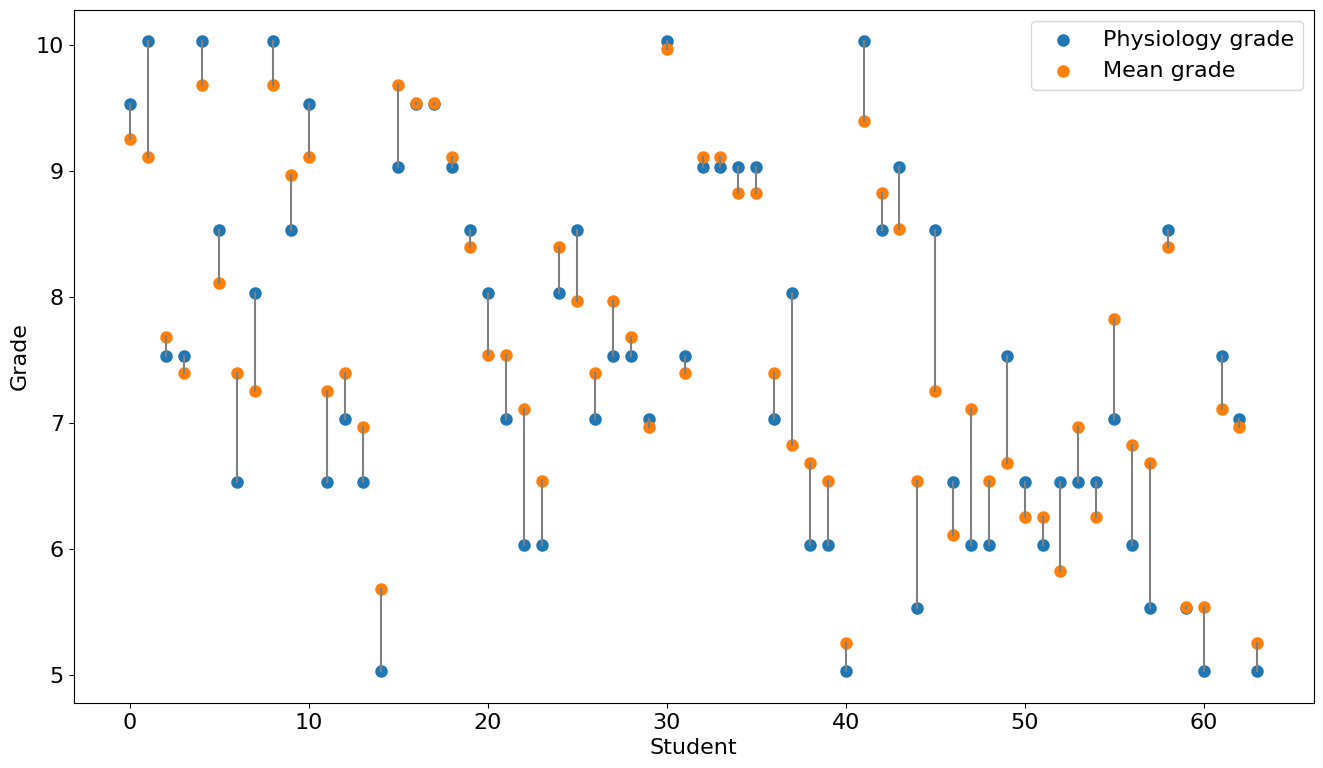

28/64
43.75


In [16]:
motivated_phys, motivated_mean = get_phys_and_mean(motivated)

plot_dots_and_lines(motivated_phys, motivated_mean, 'Physiology grade', 'Mean grade', have_text=True)

<Figure size 640x480 with 0 Axes>

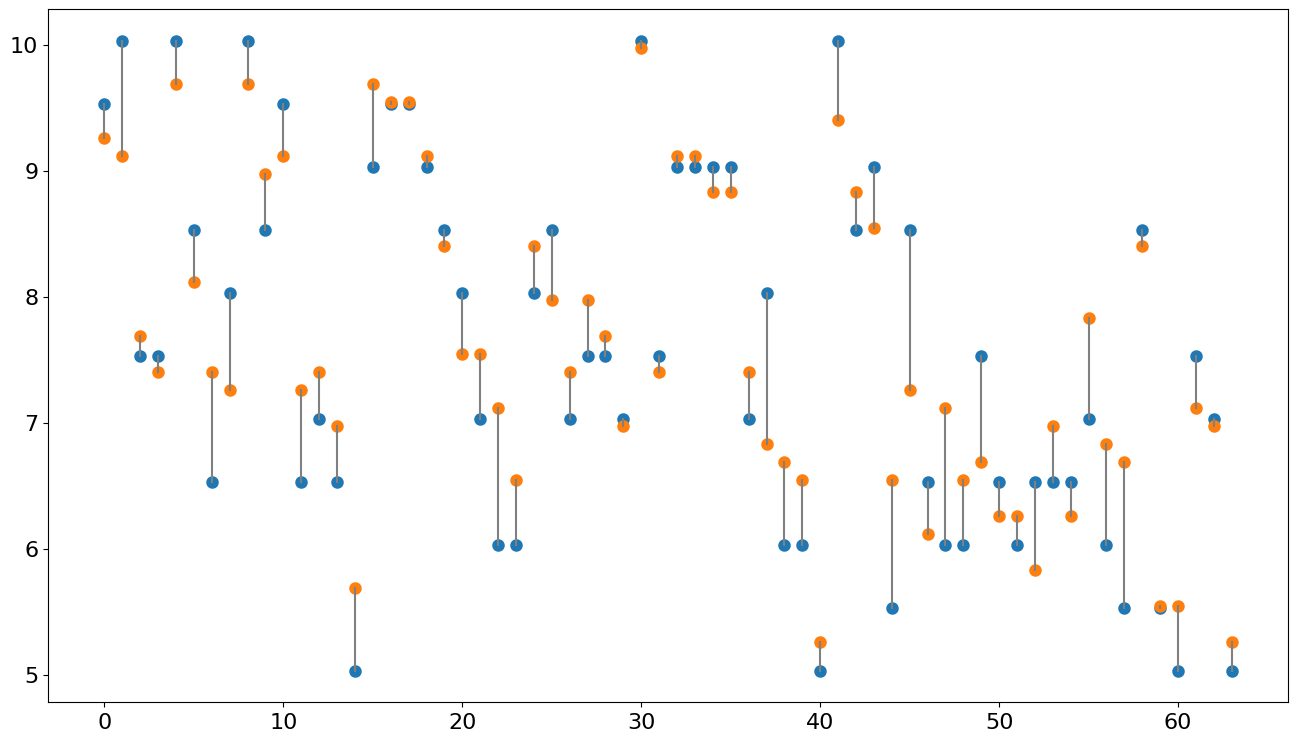

28/64
43.75


In [17]:
plot_dots_and_lines(motivated_phys, motivated_mean, 'Physiology grade', 'Mean grade', have_text=False)


<Figure size 640x480 with 0 Axes>

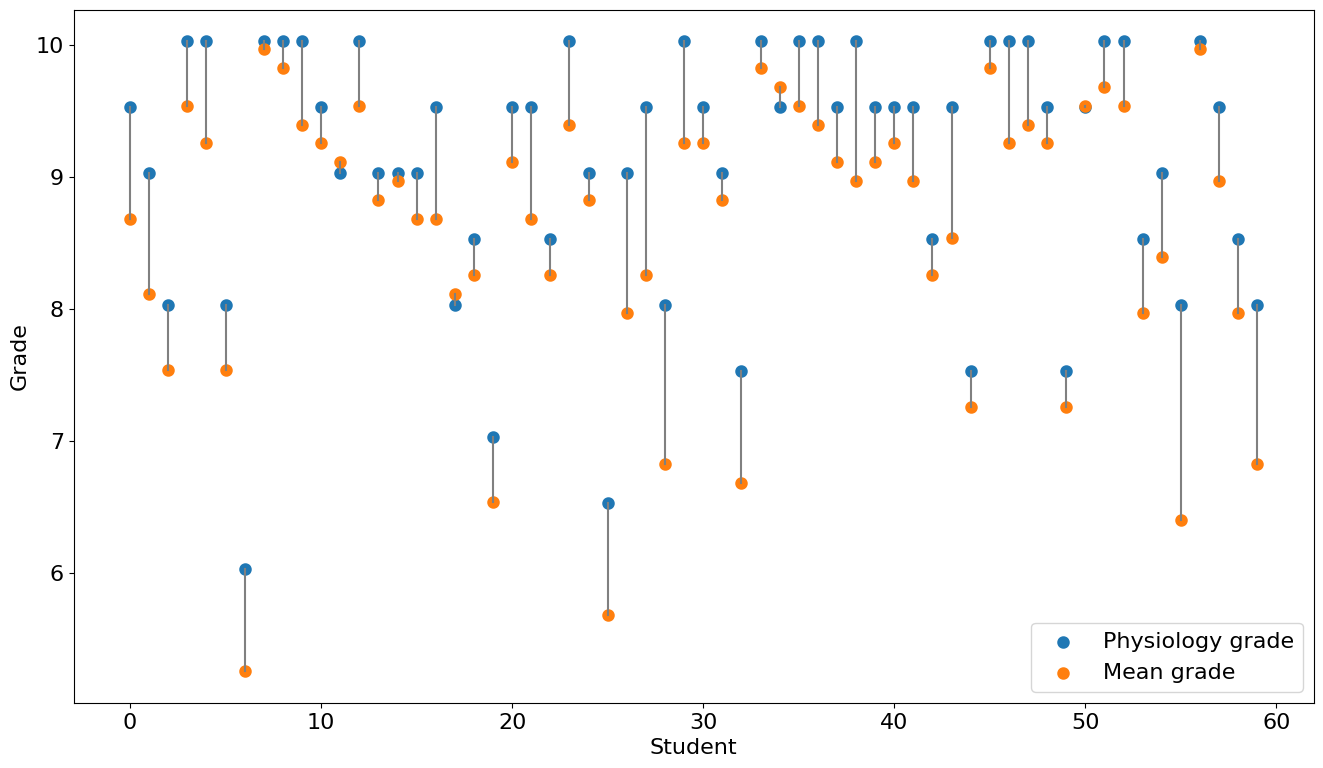

56/60
93.33333333333333


In [18]:
participants_phys, participants_mean = get_phys_and_mean(participants)
plot_dots_and_lines(participants_phys, participants_mean, 'Physiology grade', 'Mean grade', have_text=True)


<Figure size 640x480 with 0 Axes>

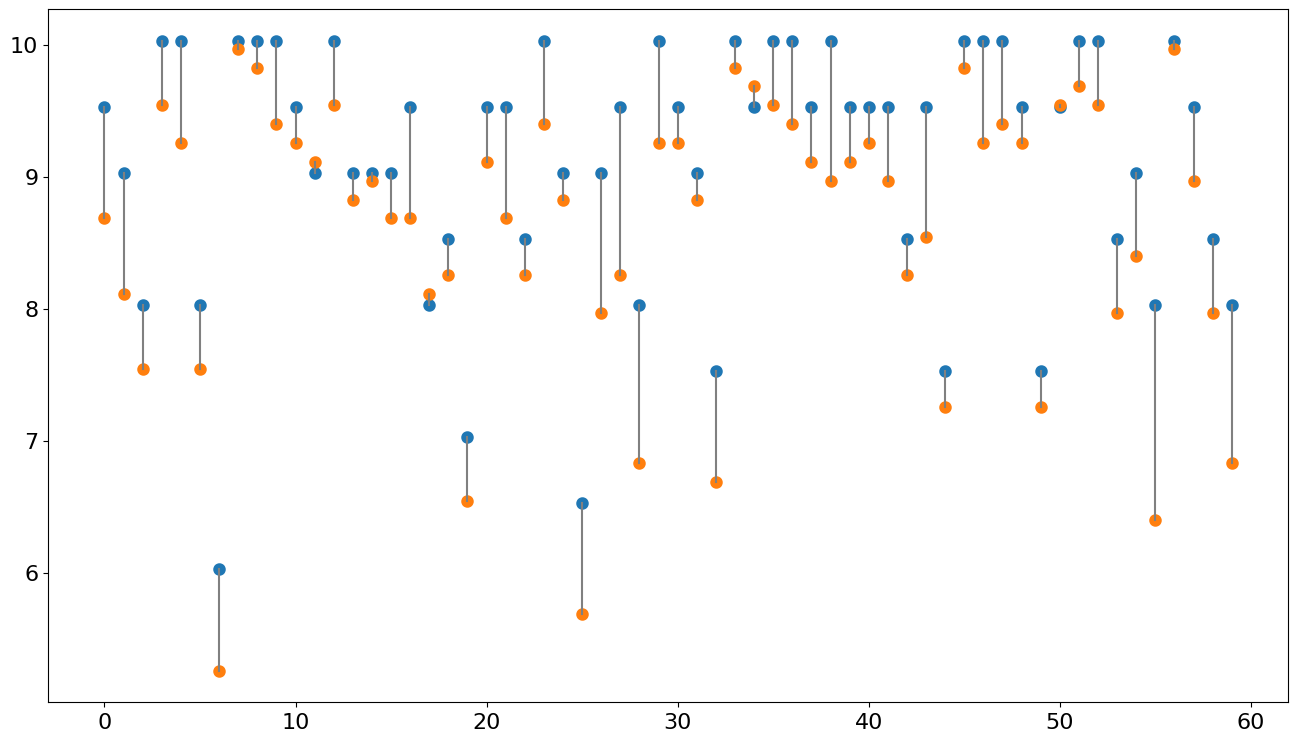

56/60
93.33333333333333


In [19]:
plot_dots_and_lines(participants_phys, participants_mean, 'Physiology grade', 'Mean grade', have_text=False)

In [20]:
plt.clf()

control_phys, control_mean = get_phys_and_mean(control)
random_arangnement = np.random.permutation(len(control_phys))
# shuffle the lists
control_phys = np.array(control_phys)[random_arangnement]
control_mean = np.array(control_mean)[random_arangnement]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

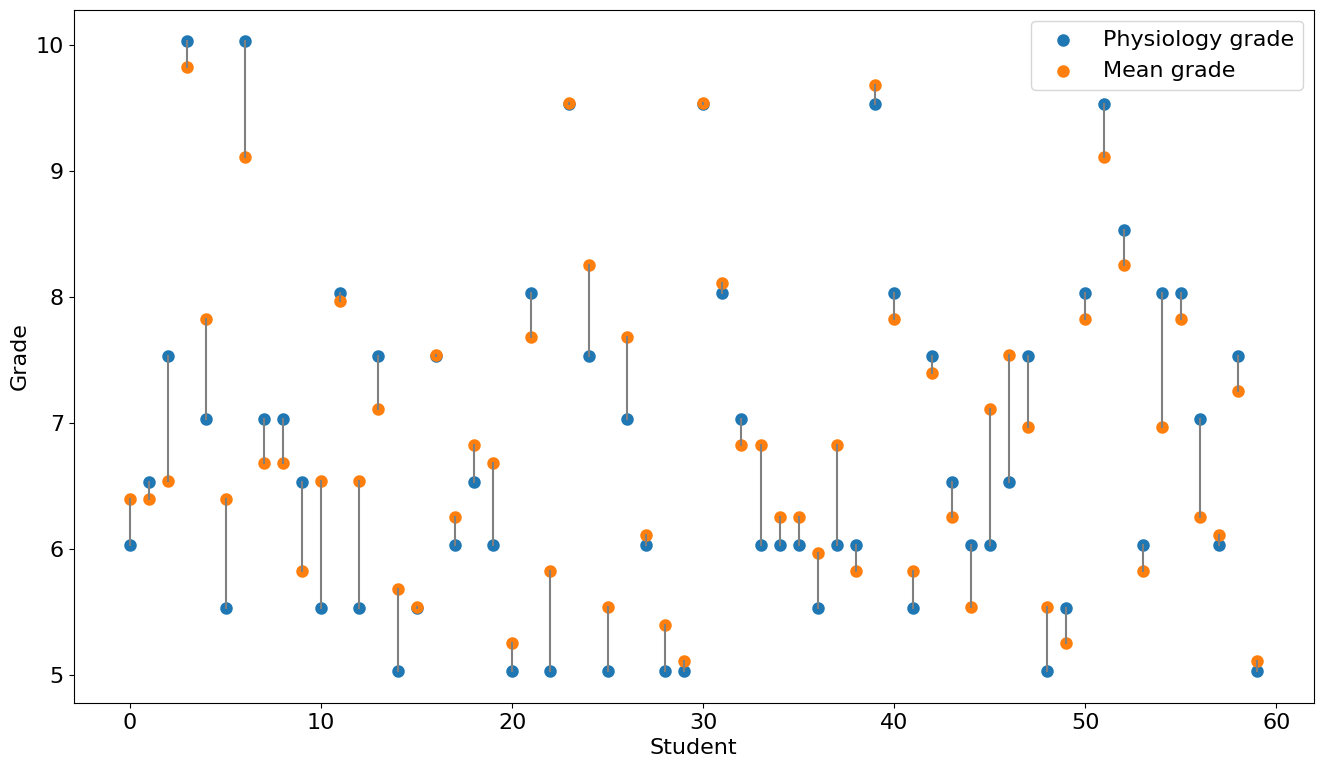

26/60
43.333333333333336


In [21]:
plot_dots_and_lines(control_phys[:60], control_mean[:60], 'Physiology grade', 'Mean grade', have_text=True)

<Figure size 640x480 with 0 Axes>

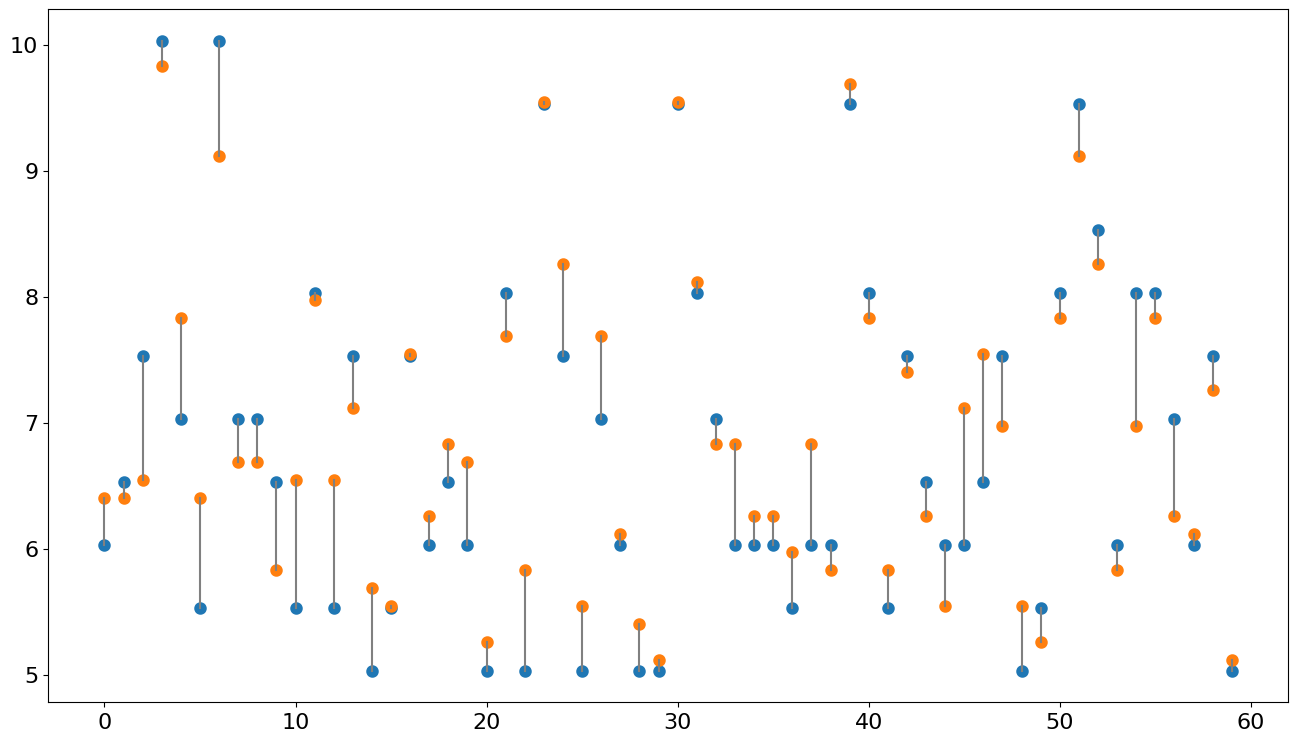

26/60
43.333333333333336


In [22]:
plot_dots_and_lines(control_phys[:60], control_mean[:60], 'Physiology grade', 'Mean grade', have_text=False)


#################################################################

<Figure size 640x480 with 0 Axes>

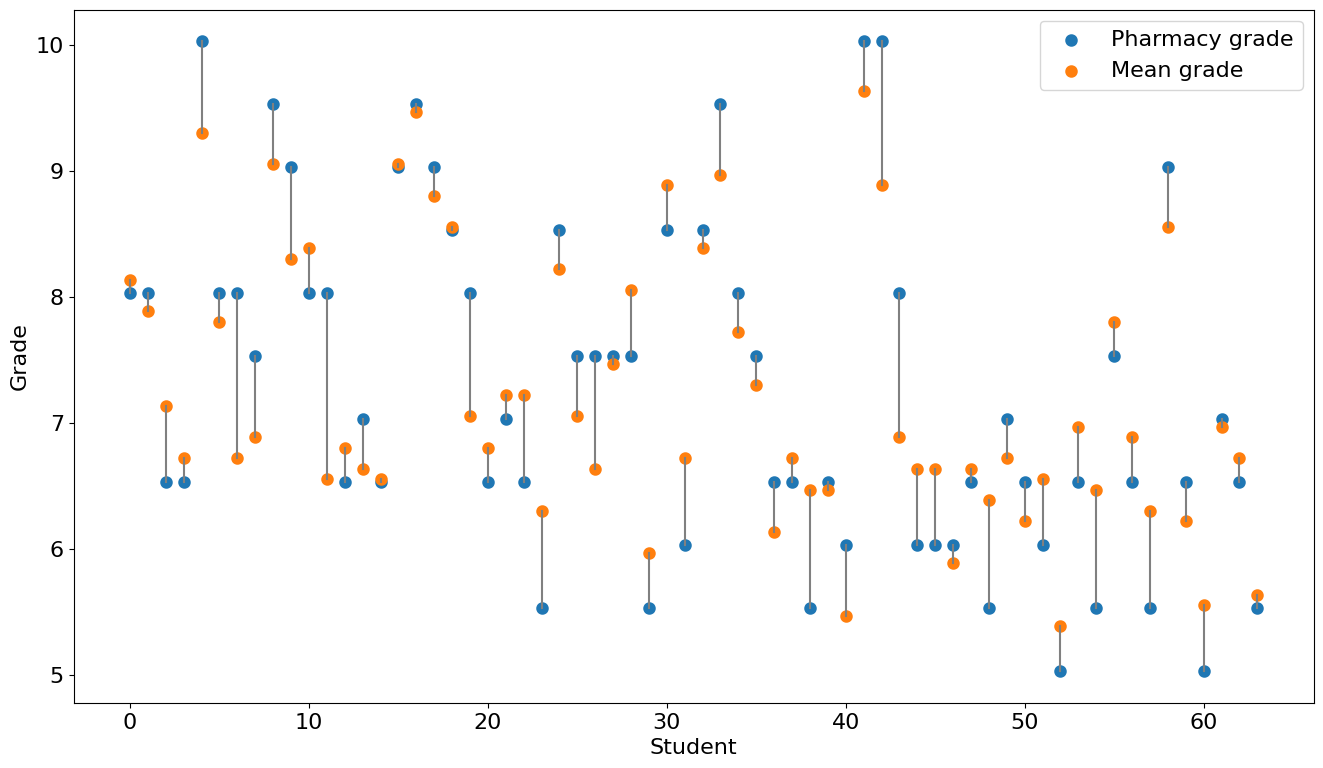

32/64
50.0


In [23]:
motivated_pharmacy, motivated_mean_pharmacy = get_pharmacy(motivated)

plot_dots_and_lines(motivated_pharmacy, motivated_mean_pharmacy, 'Pharmacy grade', 'Mean grade', have_text=True)


<Figure size 640x480 with 0 Axes>

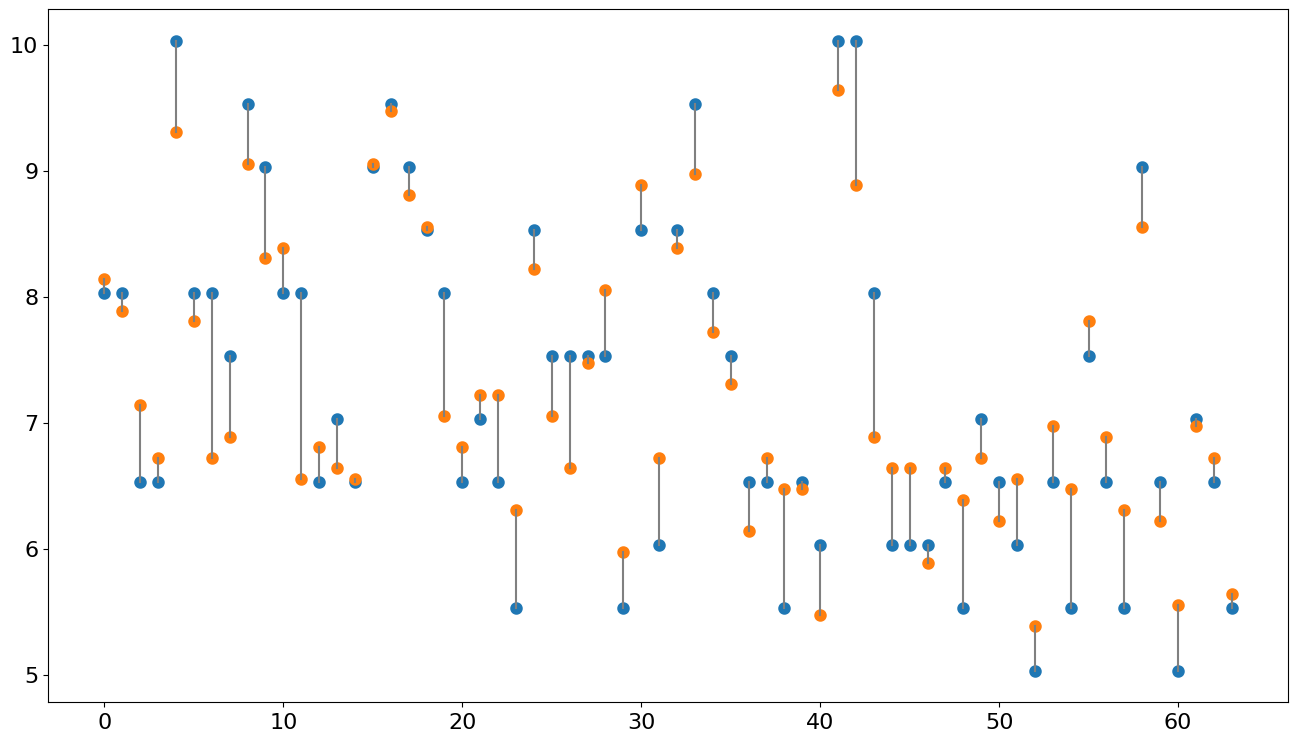

32/64
50.0


In [24]:
plot_dots_and_lines(motivated_pharmacy, motivated_mean_pharmacy, 'Pharmacy grade', 'Mean grade', have_text=False)

<Figure size 640x480 with 0 Axes>

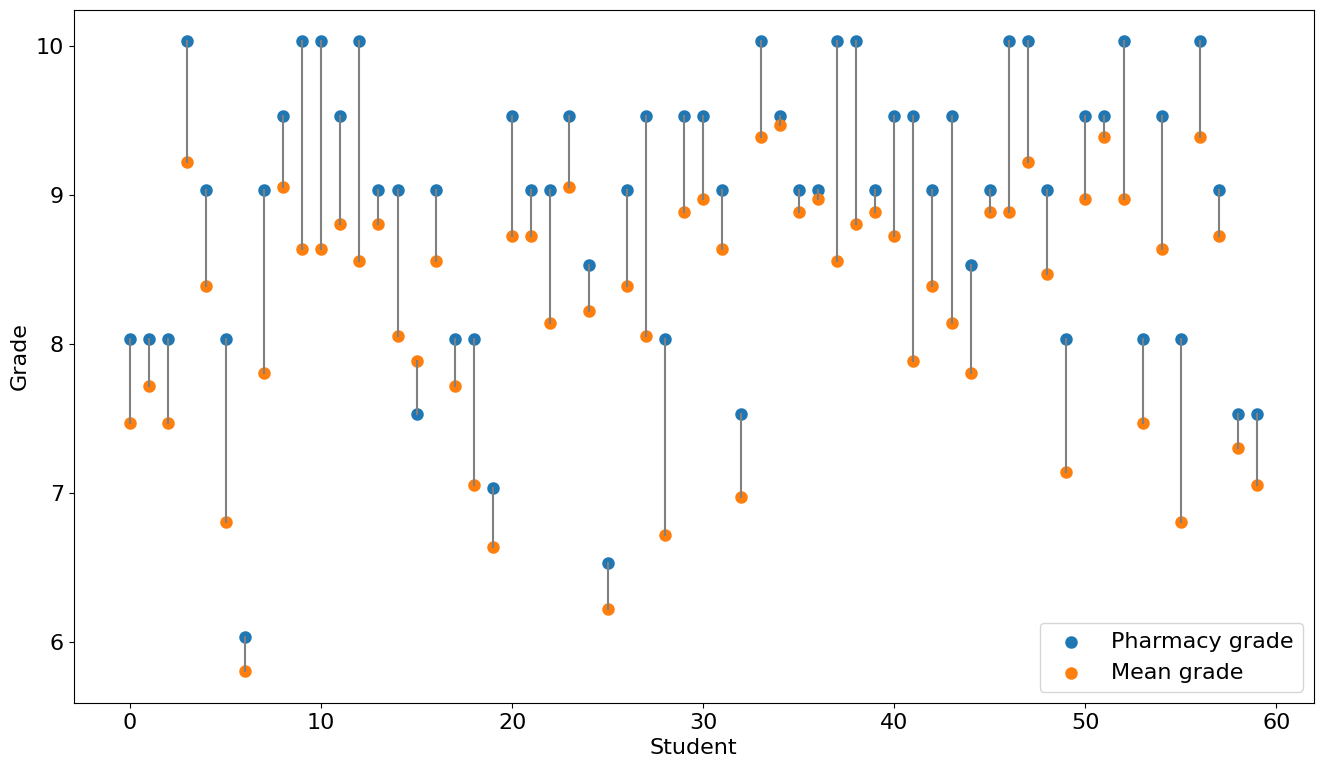

59/60
98.33333333333333


In [25]:
participants_pharmacy, participants_mean_pharmacy = get_pharmacy(participants)

plot_dots_and_lines(participants_pharmacy, participants_mean_pharmacy, 'Pharmacy grade', 'Mean grade', have_text=True)

<Figure size 640x480 with 0 Axes>

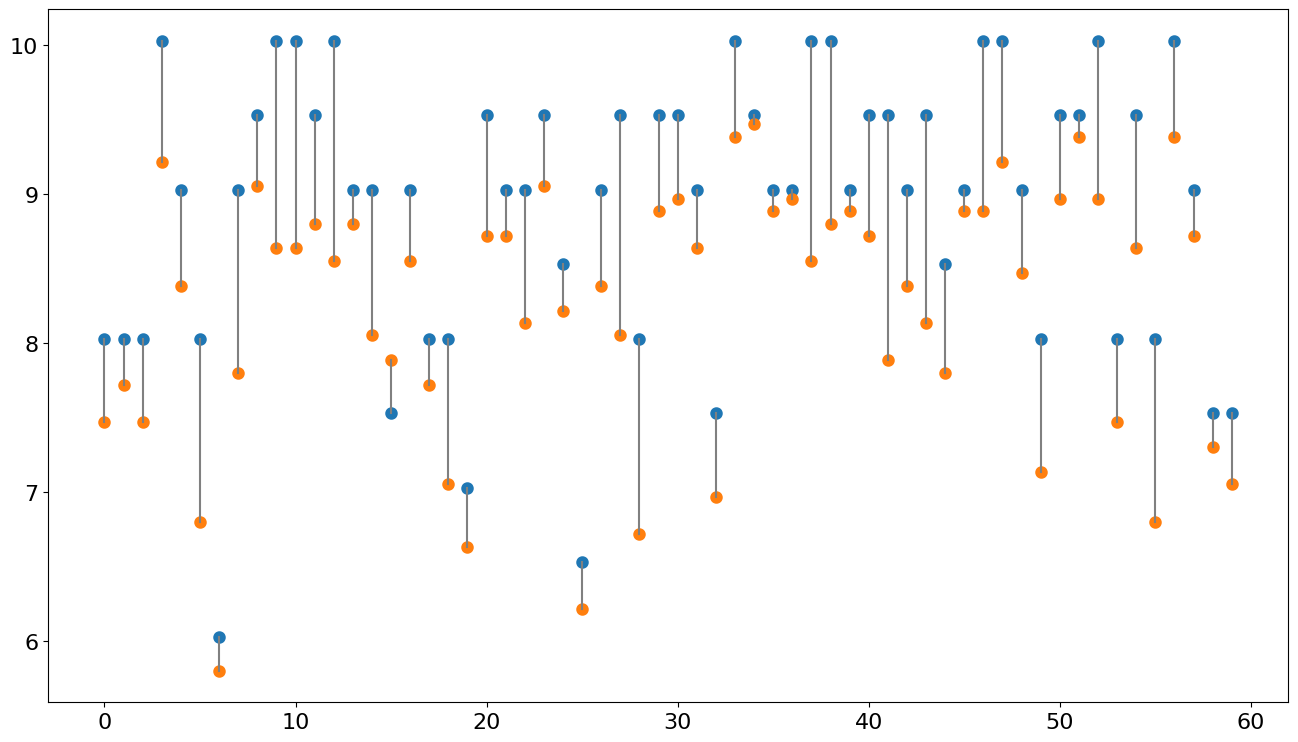

59/60
98.33333333333333


In [26]:
plot_dots_and_lines(participants_pharmacy, participants_mean_pharmacy, 'Pharmacy grade', 'Mean grade', have_text=False)

In [27]:
control_pharmacy, control_mean_pharmacy = get_pharmacy(control)
control_pharmacy = np.array(control_pharmacy)[random_arangnement]
control_mean_pharmacy = np.array(control_mean_pharmacy)[random_arangnement]


<Figure size 640x480 with 0 Axes>

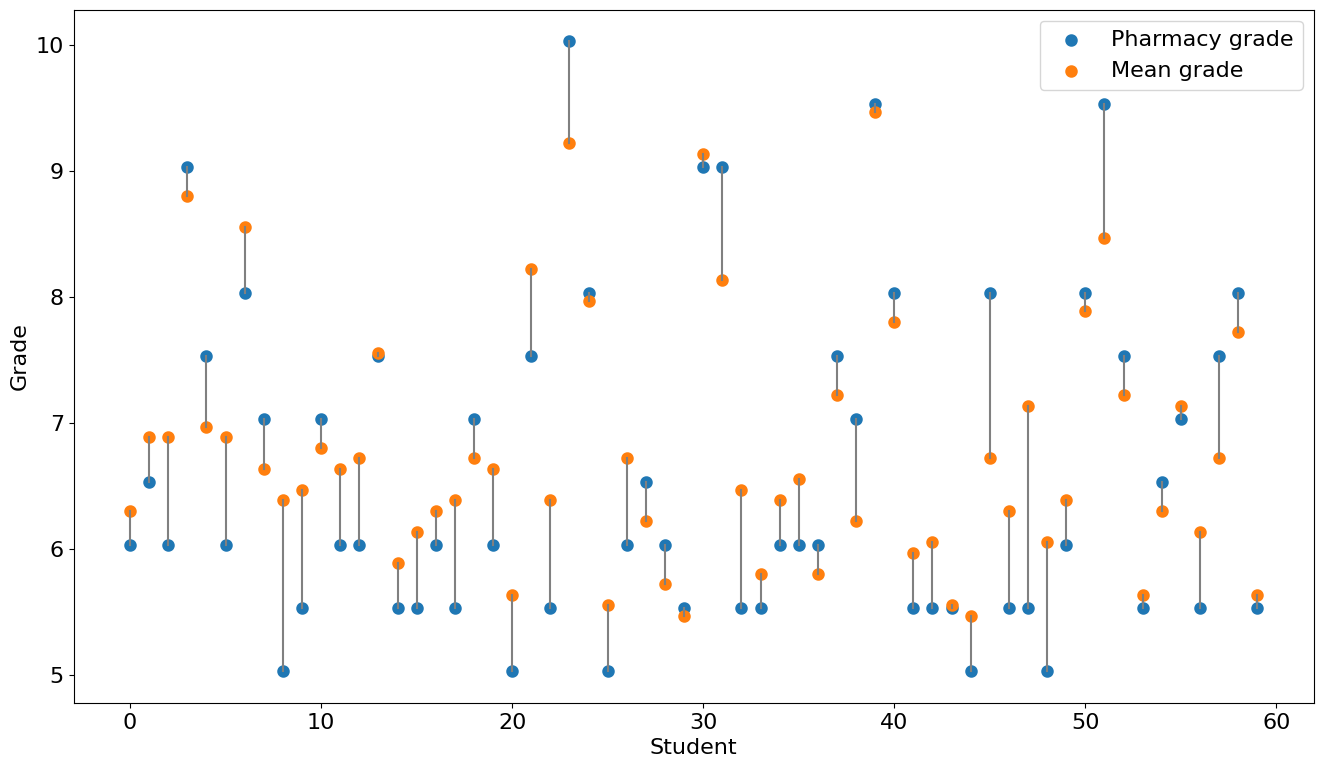

23/60
38.333333333333336


In [28]:
plot_dots_and_lines(control_pharmacy[:60], control_mean_pharmacy[:60], 'Pharmacy grade', 'Mean grade', have_text=True)

<Figure size 640x480 with 0 Axes>

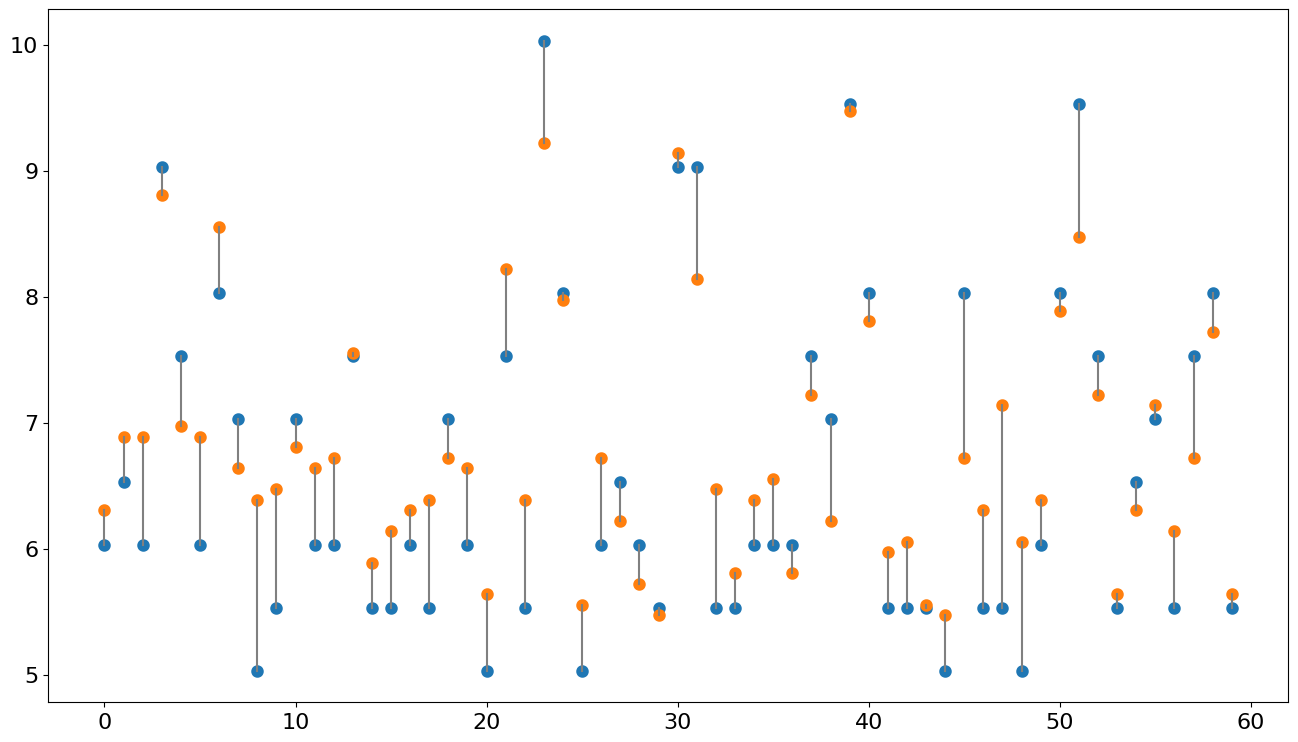

23/60
38.333333333333336


In [29]:
plot_dots_and_lines(control_pharmacy[:60], control_mean_pharmacy[:60], 'Pharmacy grade', 'Mean grade', have_text=False)


###############################################################

<Figure size 640x480 with 0 Axes>

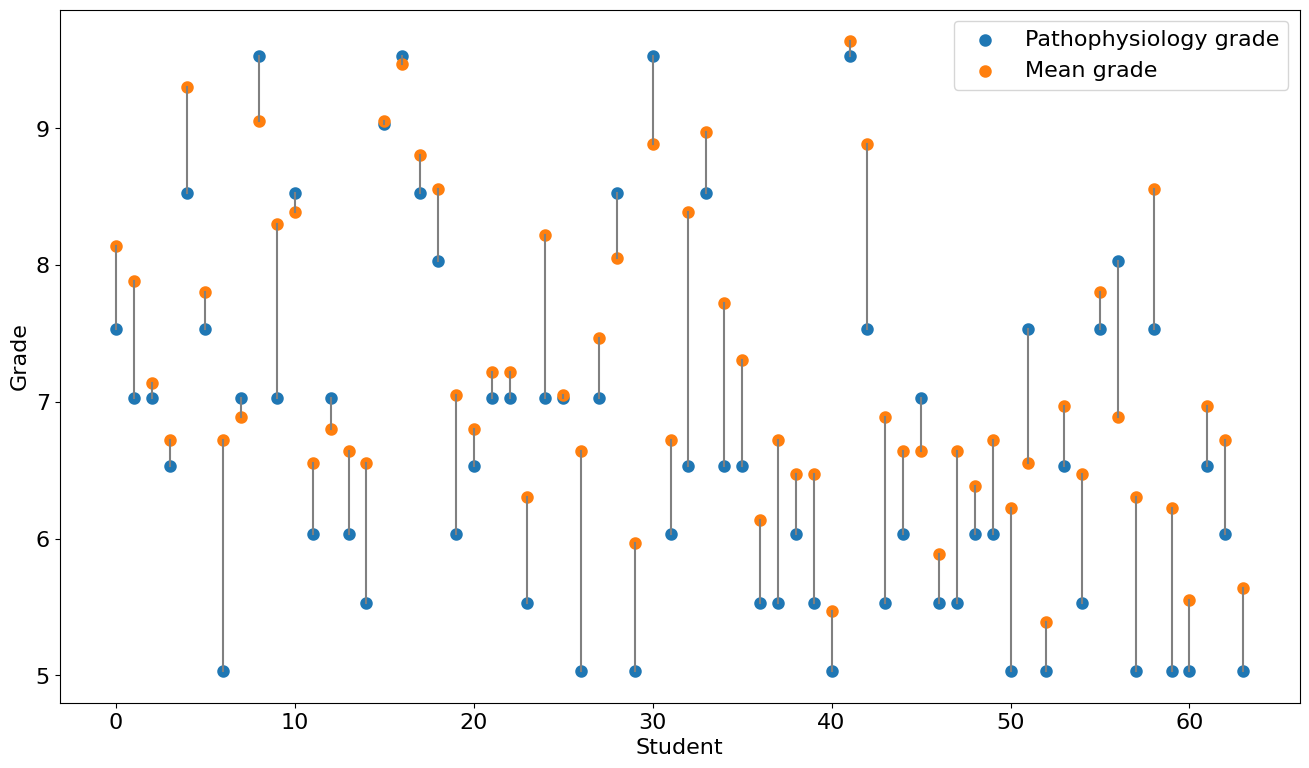

10/64
15.625


In [30]:
motivated_path_phys, motivated_mean_path_phys = get_path_phys(motivated)
plot_dots_and_lines(motivated_path_phys, motivated_mean_path_phys, 'Pathophysiology grade', 'Mean grade', have_text=True)


<Figure size 640x480 with 0 Axes>

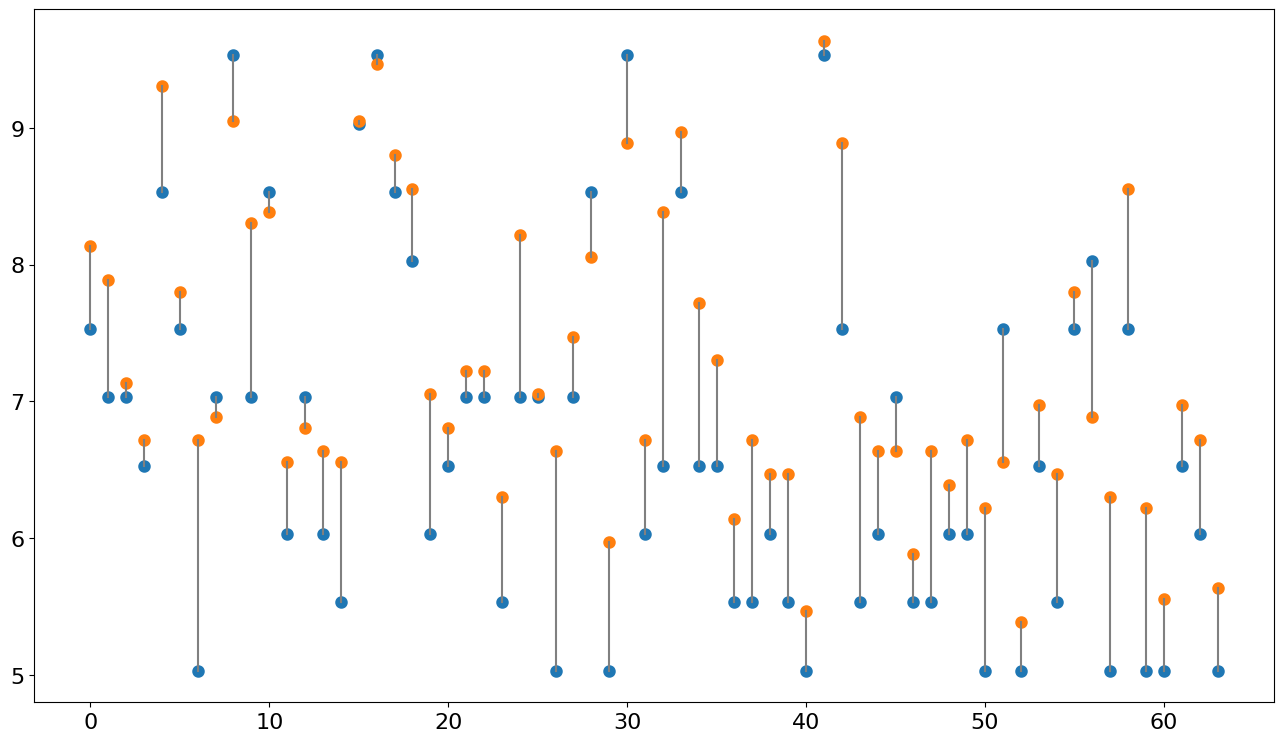

10/64
15.625


In [31]:
plot_dots_and_lines(motivated_path_phys, motivated_mean_path_phys, 'Pathophysiology grade', 'Mean grade', have_text=False)

<Figure size 640x480 with 0 Axes>

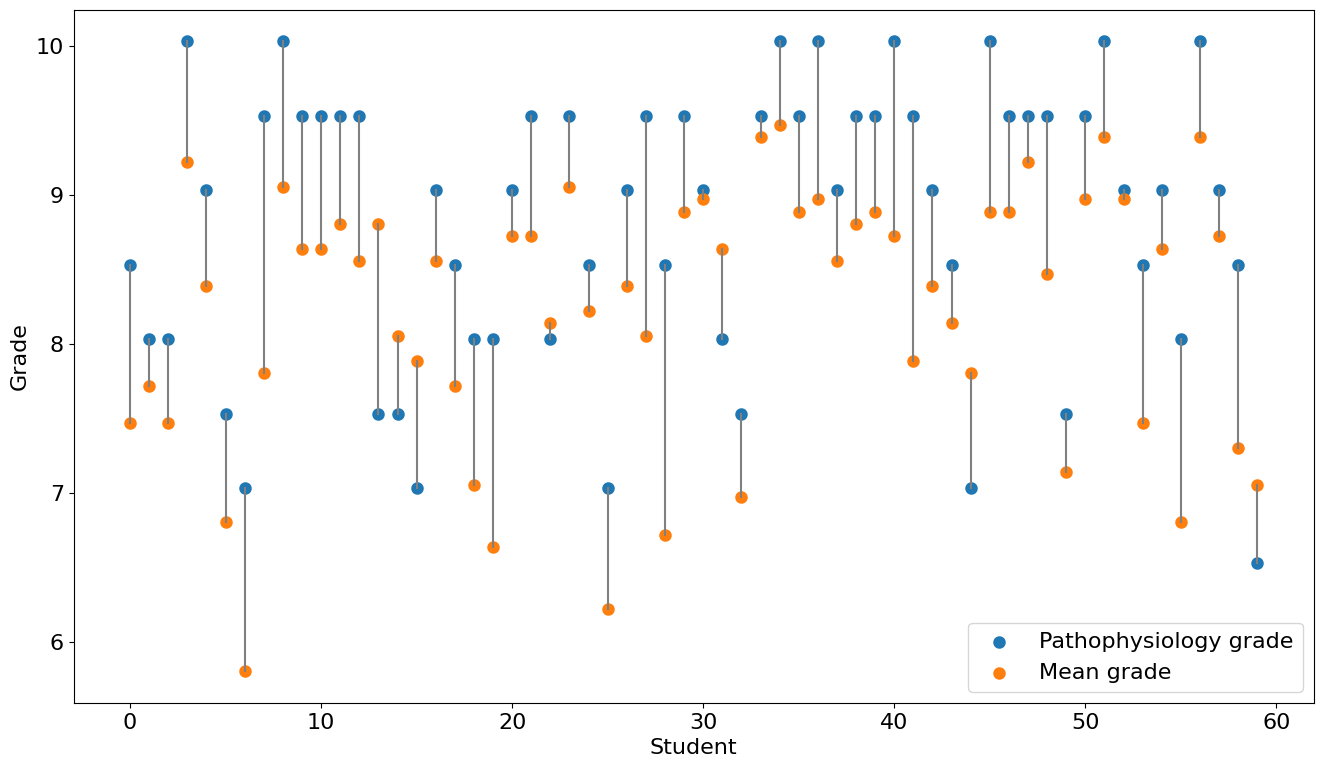

53/60
88.33333333333333


In [32]:
participants_path_phys, participants_mean_path_phys = get_path_phys(participants)
plot_dots_and_lines(participants_path_phys, participants_mean_path_phys, 'Pathophysiology grade', 'Mean grade', have_text=True)


<Figure size 640x480 with 0 Axes>

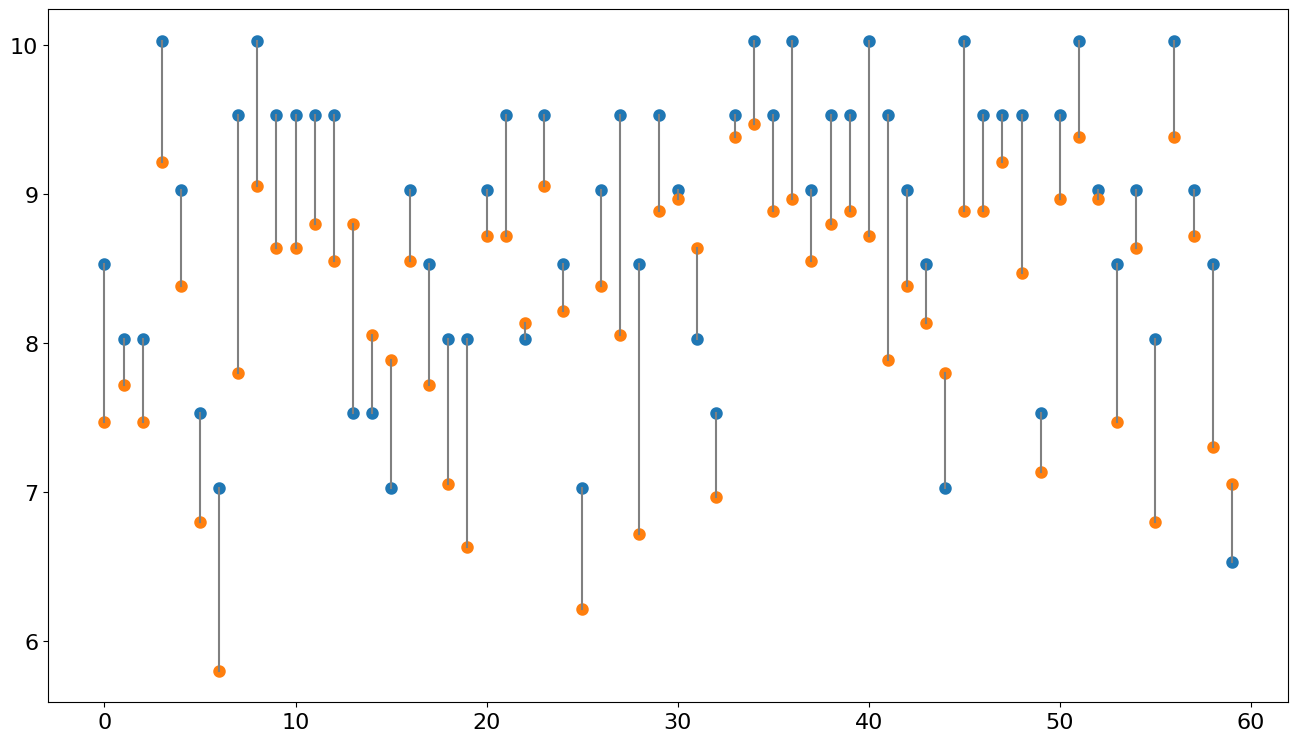

53/60
88.33333333333333


In [33]:
plot_dots_and_lines(participants_path_phys, participants_mean_path_phys, 'Pathophysiology grade', 'Mean grade', have_text=False)

In [34]:
control_path_phys, control_mean_path_phys = get_path_phys(control)
control_path_phys = np.array(control_path_phys)[random_arangnement]
control_mean_path_phys = np.array(control_mean_path_phys)[random_arangnement]


<Figure size 640x480 with 0 Axes>

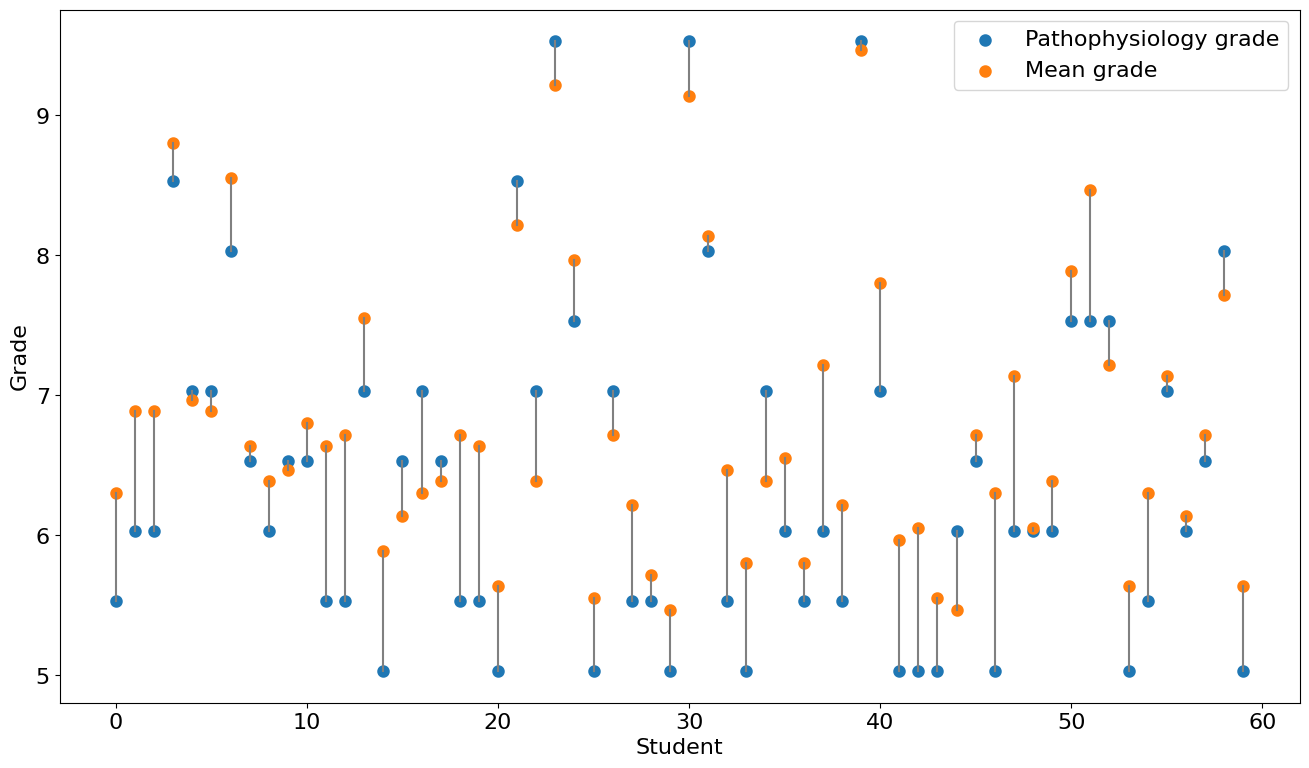

16/60
26.666666666666668


In [35]:
plot_dots_and_lines(control_path_phys[:60], control_mean_path_phys[:60], 'Pathophysiology grade', 'Mean grade', have_text=True)

<Figure size 640x480 with 0 Axes>

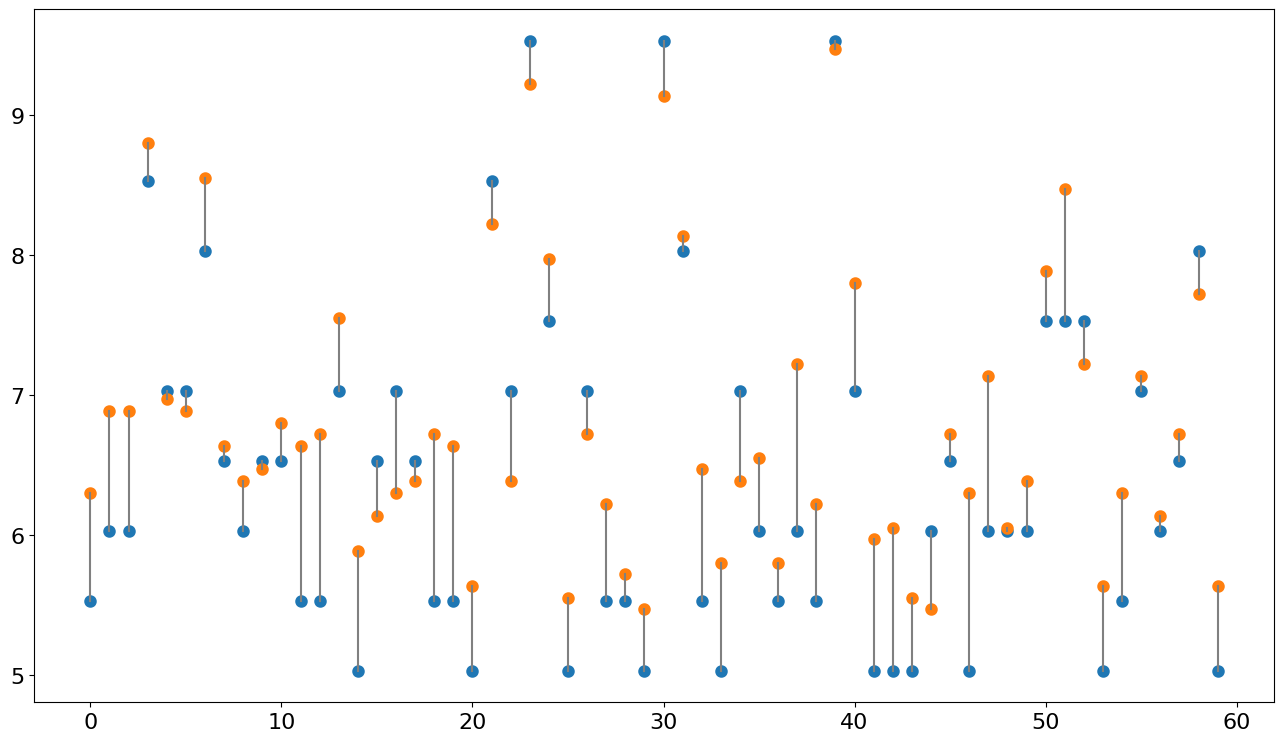

16/60
26.666666666666668


In [36]:
plot_dots_and_lines(control_path_phys[:60], control_mean_path_phys[:60], 'Pathophysiology grade', 'Mean grade', have_text=False)

In [37]:
'''
"Numbering"                              int64
"Study groups"                           object
"StudentID"                              int64
"Group"                                  int64
"1անատ"                                  int64
"2անատ"                                  int64
"2Հյուսվ"                                int64
"2Կենսաբ"                                int64
"Sum of  1 Year"                         object
"3 Կենսաքիմիա"                           int64
"3 Հյուսվածքաբանություն"                 int64
"3 Անատոմիա"                             int64
"3 Ֆիզիոլոգիա"                           int64
"4 Կենսաքիմիա"                           int64
"4 Մանրէաբանություն"                     int64
"4 ֆիզիոլոգիա"                           int64
"Sum of 2 year"                          int64
"5 Մանրէաբանություն"                     int64
"5Ախտաբանական անատոմիա"                  int64
"5 Ֆարմակոլոգիա"                         int64
"5Ախտաֆիզ"                               int64
"5 Օպերատիվ վիրաբուժություն"             int64
"5Ներքին հիվանդությունների պրոպեդևտիկա"  int64
"5 Ընդհանուր վիրաբուժություն "           int64
"6Ներքին հիվանդությունների պրոպեդևտիկա"  int64
"6Ախտաբանական անատոմիա"                  int64
"6 Ֆարմակոլոգիա"                         int64
"6Ախտաբանական ֆիզոլոգիա"                 int64
"6 Ընդհանուր վիրաբուժություն "           int64
"sum"                                    int64
'''

'\n"Numbering"                              int64\n"Study groups"                           object\n"StudentID"                              int64\n"Group"                                  int64\n"1անատ"                                  int64\n"2անատ"                                  int64\n"2Հյուսվ"                                int64\n"2Կենսաբ"                                int64\n"Sum of  1 Year"                         object\n"3 Կենսաքիմիա"                           int64\n"3 Հյուսվածքաբանություն"                 int64\n"3 Անատոմիա"                             int64\n"3 Ֆիզիոլոգիա"                           int64\n"4 Կենսաքիմիա"                           int64\n"4 Մանրէաբանություն"                     int64\n"4 ֆիզիոլոգիա"                           int64\n"Sum of 2 year"                          int64\n"5 Մանրէաբանություն"                     int64\n"5Ախտաբանական անատոմիա"                  int64\n"5 Ֆարմակոլոգիա"                         int64\n"5Ախտաֆիզ"                         

In [38]:
semester_names = {
    '1': ['1անատ'],
    '2': ['2անատ', '2Հյուսվ', '2Կենսաբ'],
    '3': ['3 Կենսաքիմիա', '3 Հյուսվածքաբանություն', '3 Անատոմիա', '3 Ֆիզիոլոգիա'],
    '4': ['4 Կենսաքիմիա', '4 Մանրէաբանություն', '4 ֆիզիոլոգիա'],
    '5': ['5 Մանրէաբանություն', '5Ախտաբանական անատոմիա', '5 Ֆարմակոլոգիա', '5Ախտաֆիզ', '5 Օպերատիվ վիրաբուժություն', '5Ներքին հիվանդությունների պրոպեդևտիկա', '5 Ընդհանուր վիրաբուժություն '],
    '6': ['6Ներքին հիվանդությունների պրոպեդևտիկա', '6Ախտաբանական անատոմիա', '6 Ֆարմակոլոգիա', '6Ախտաբանական ֆիզոլոգիա', '6 Ընդհանուր վիրաբուժություն ']
}

In [39]:
year_names = {
    '1': semester_names['1'] + semester_names['2'],
    '2': semester_names['3'] + semester_names['4'],
    '3': semester_names['5'] + semester_names['6']
}

In [40]:
def get_year_mean(d, year):
    assert year in [1, 2, 3]
    columns = year_names[str(year)]
    return d[columns].mean(axis=1).tolist()

def get_sem_mean(d, sem):
    assert sem in [1, 2, 3, 4, 5, 6]
    columns = semester_names[str(sem)]
    return d[columns].mean(axis=1).tolist()

def get_sem_mean_movement(d):
    return [
        [x, y, z, a, b, c] for x, y, z, a, b, c in zip(get_sem_mean(d, 1), get_sem_mean(d, 2), get_sem_mean(d, 3), get_sem_mean(d, 4), get_sem_mean(d, 5), get_sem_mean(d, 6))
    ]

def get_year_mean_movement(d):
    return [
        [x, y, z] for x, y, z in zip(get_year_mean(d, 1), get_year_mean(d, 2), get_year_mean(d, 3))
    ]


In [64]:
def plot_movement(movement, color='black', only_means=False):


    # plot all different colors. x axis is the number of the semester, y axis is the mean of the semester
    if not only_means:
        for sem in movement:
            plt.plot(np.arange(1, len(movement[0]) + 1), sem, ':', color=color, alpha=0.5, linewidth=1)

    # plot the mean of the movement
    # show the points as a big dot
    mean_movement = np.mean(movement, axis=0)
    plt.plot(np.arange(1, len(mean_movement) + 1), mean_movement, color=color, alpha=1, linewidth=3)
    if not only_means:
        plt.plot(np.arange(1, len(mean_movement) + 1), mean_movement, '^', color=color, alpha=1, linewidth=8)
        print(mean_movement)


def plot_sem_movement(d, color='black', only_means=False):
    # plot size
    sem_mean_movement = get_sem_mean_movement(d)
    plot_movement(sem_mean_movement, color=color, only_means=only_means)

def plot_year_movement(d, color='black'):
    plot_movement(get_year_mean_movement(d), color=color)

In [65]:
# random sample the control group
control_sample = control.sample(60, replace=False)

[7.84375    7.953125   7.59765625 7.69791667 7.16294643 7.390625  ]
[8.18333333 8.08888889 8.4625     8.86666667 8.1        8.49      ]
[7.55       7.36666667 7.22916667 7.20555556 6.92142857 7.19333333]


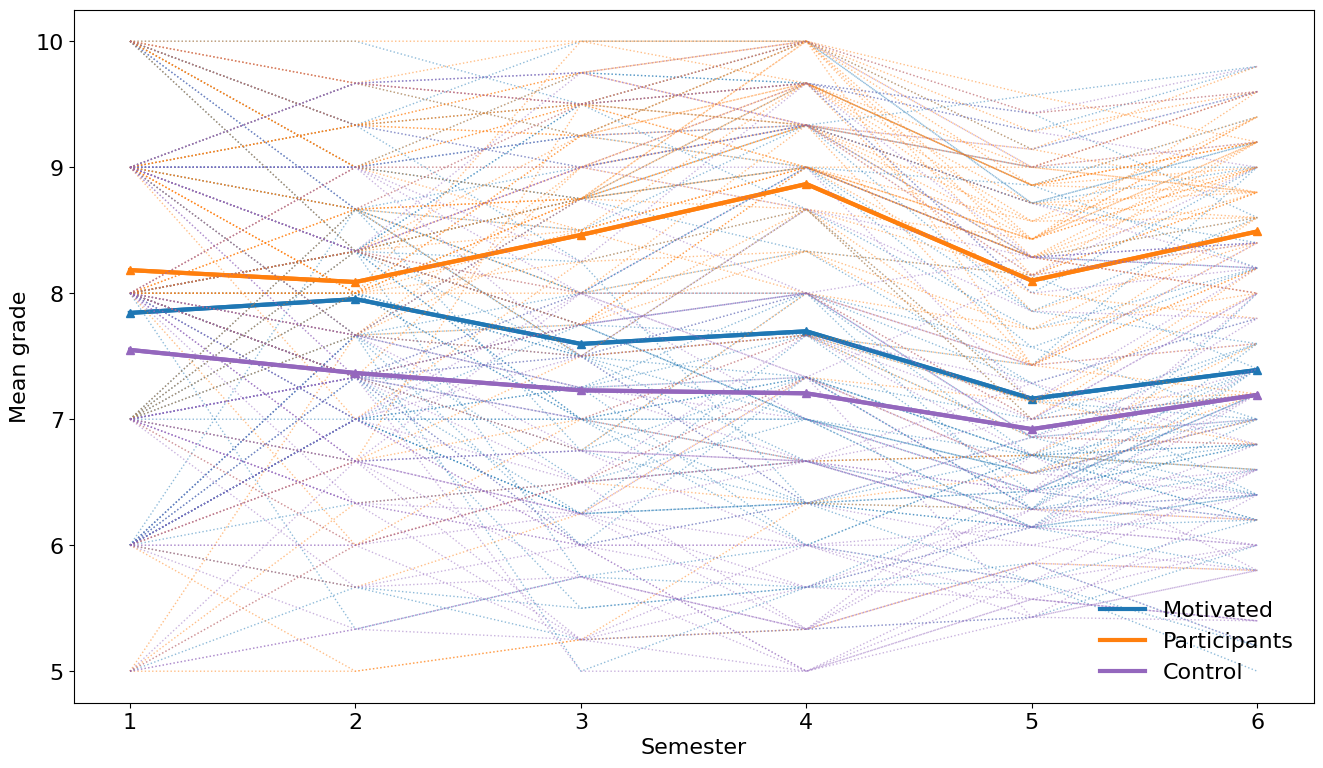

In [115]:
plt.figure(figsize=(16, 9))
plot_sem_movement(motivated, color=nice_colors[0], only_means=True)
plot_sem_movement(participants, color=nice_colors[1], only_means=True)
plot_sem_movement(control_sample, color=nice_colors[4], only_means=True)
plt.legend(['Motivated', 'Participants', 'Control'], fontsize=16, loc='lower right', frameon=False)
plot_sem_movement(motivated, color=nice_colors[0], only_means=False)
plot_sem_movement(participants, color=nice_colors[1], only_means=False)
plot_sem_movement(control_sample, color=nice_colors[4], only_means=False)
plt.xlabel('Semester', fontsize=16)
plt.ylabel('Mean grade', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
# plt.legend(['Motivated', 'Participants', 'Control'], fontsize=16)

[7.84375    7.953125   7.59765625 7.69791667 7.16294643 7.390625  ]
[8.18333333 8.08888889 8.4625     8.86666667 8.1        8.49      ]
[7.55       7.36666667 7.22916667 7.20555556 6.92142857 7.19333333]


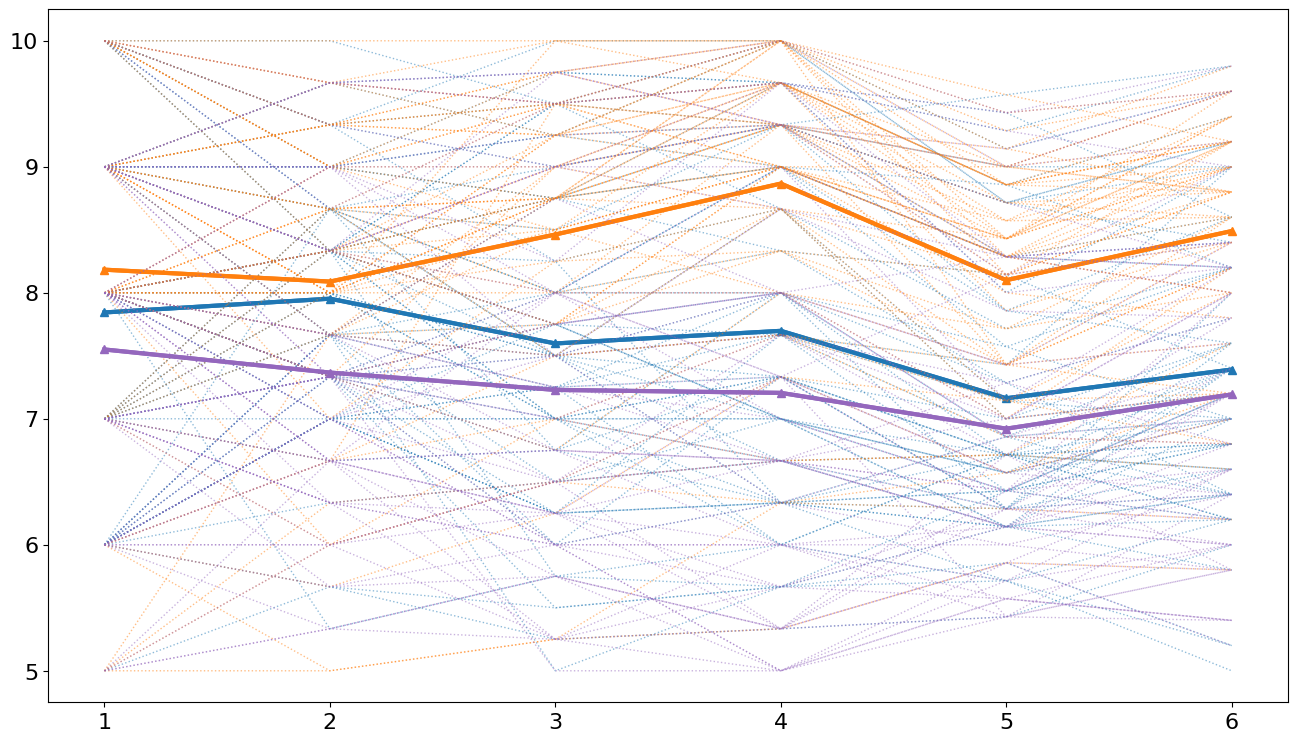

In [70]:
plt.figure(figsize=(16, 9))
plot_sem_movement(motivated, color=nice_colors[0], only_means=True)
plot_sem_movement(participants, color=nice_colors[1], only_means=True)
plot_sem_movement(control_sample, color=nice_colors[4], only_means=True)
# plt.legend(['Motivated', 'Participants', 'Control'], fontsize=16, loc='lower right')
plot_sem_movement(motivated, color=nice_colors[0], only_means=False)
plot_sem_movement(participants, color=nice_colors[1], only_means=False)
plot_sem_movement(control_sample, color=nice_colors[4], only_means=False)
# plt.xlabel('Semester', fontsize=16)
# plt.ylabel('Mean grade', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [75]:
"""
"1անատ"                                  int64
"2անատ"                                  int64
"2Հյուսվ"                                int64
"2Կենսաբ"                                int64
"Sum of  1 Year"                         object
"3 Կենսաքիմիա"                           int64
"3 Հյուսվածքաբանություն"                 int64
"3 Անատոմիա"                             int64
"3 Ֆիզիոլոգիա"                           int64
"4 Կենսաքիմիա"                           int64
"4 Մանրէաբանություն"                     int64
"4 ֆիզիոլոգիա"                           int64
"Sum of 2 year"                          int64
"5 Մանրէաբանություն"                     int64
"5Ախտաբանական անատոմիա"                  int64
"5 Ֆարմակոլոգիա"                         int64
"5Ախտաֆիզ"                               int64
"5 Օպերատիվ վիրաբուժություն"             int64
"5Ներքին հիվանդությունների պրոպեդևտիկա"  int64
"5 Ընդհանուր վիրաբուժություն "           int64
"6Ներքին հիվանդությունների պրոպեդևտիկա"  int64
"6Ախտաբանական անատոմիա"                  int64
"6 Ֆարմակոլոգիա"                         int64
"6Ախտաբանական ֆիզոլոգիա"                 int64
"6 Ընդհանուր վիրաբուժություն "           int64
"""
all_subjects = [
    '1անատ',
    '2անատ',
    '2Հյուսվ',
    '2Կենսաբ',
    '3 Կենսաքիմիա',
    '3 Հյուսվածքաբանություն',
    '3 Անատոմիա',
    '3 Ֆիզիոլոգիա',
    '4 Կենսաքիմիա',
    '4 Մանրէաբանություն',
    '4 ֆիզիոլոգիա',
    '5 Ֆարմակոլոգիա',
    '5Ախտաֆիզ',
    '6 Ֆարմակոլոգիա',
    '6Ախտաբանական ֆիզոլոգիա',
]

In [119]:
extended_subjects = [
    '1անատ',
    '2անատ',
    '2Հյուսվ',
    '2Կենսաբ',
    '3 Կենսաքիմիա',
    '3 Հյուսվածքաբանություն',
    '3 Անատոմիա',
    '3 Ֆիզիոլոգիա',
    '4 Կենսաքիմիա',
    '4 Մանրէաբանություն',
    '4 ֆիզիոլոգիա',
    '5Ներքին հիվանդությունների պրոպեդևտիկա',
    '5 Ֆարմակոլոգիա',
    '5Ախտաֆիզ',
    '6Ներքին հիվանդությունների պրոպեդևտիկա',
    '6 Ֆարմակոլոգիա',
    '6Ախտաբանական ֆիզոլոգիա',
]

In [ ]:
name_to_better_name = {
    '1անատ': '1 Anatomy',
    '2անատ': '2 Anatomy',
    '2Հյուսվ': '2 Histology',
    '2Կենսաբ': '2 Biology',
    '3 Կենսաքիմիա': '3 Biochemistry',
    '3 Հյուսվածքաբանություն': '3 Histology',
    '3 Անատոմիա': '3 Anatomy',
    '3 Ֆիզիոլոգիա': '3 Physiology',
    '4 Կենսաքիմիա': '4 Biochemistry',
    '4 Մանրէաբանություն': '4 Microbiology',
    '4 ֆիզիոլոգիա': '4 Physiology',
    '5Ներքին հիվանդությունների պոպեդևտիկա': '5 Propaedeutics of Internal Medicine',
    '5 Ֆարմակոլոգիա': '5 Pharmacology',
    '5Ախտաֆիզ': '5 Pathophysiology',
    '6Ներքին հիվանդությունների պրոպեդևտիկա': '6 Propaedeutics of Internal Medicine',
    '6 Ֆարմակոլոգիա': '6 Pharmacology',
    '6Ախտաբանական ֆիզոլոգիա': '6 Pathophysiology',
}

([<matplotlib.axis.XTick at 0x7eb000410500>,
 [Text(0, 0, '1անատ'),
  Text(3, 0, '2անատ'),
  Text(6, 0, '2Հյուսվ'),
  Text(9, 0, '2Կենսաբ'),
  Text(12, 0, '3 Կենսաքիմիա'),
  Text(15, 0, '3 Հյուսվածքաբանություն'),
  Text(18, 0, '3 Անատոմիա'),
  Text(21, 0, '3 Ֆիզիոլոգիա'),
  Text(24, 0, '4 Կենսաքիմիա'),
  Text(27, 0, '4 Մանրէաբանություն'),
  Text(30, 0, '4 ֆիզիոլոգիա'),
  Text(33, 0, '5 Ֆարմակոլոգիա'),
  Text(36, 0, '5Ախտաֆիզ'),
  Text(39, 0, '6 Ֆարմակոլոգիա'),
  Text(42, 0, '6Ախտաբանական ֆիզոլոգիա')])

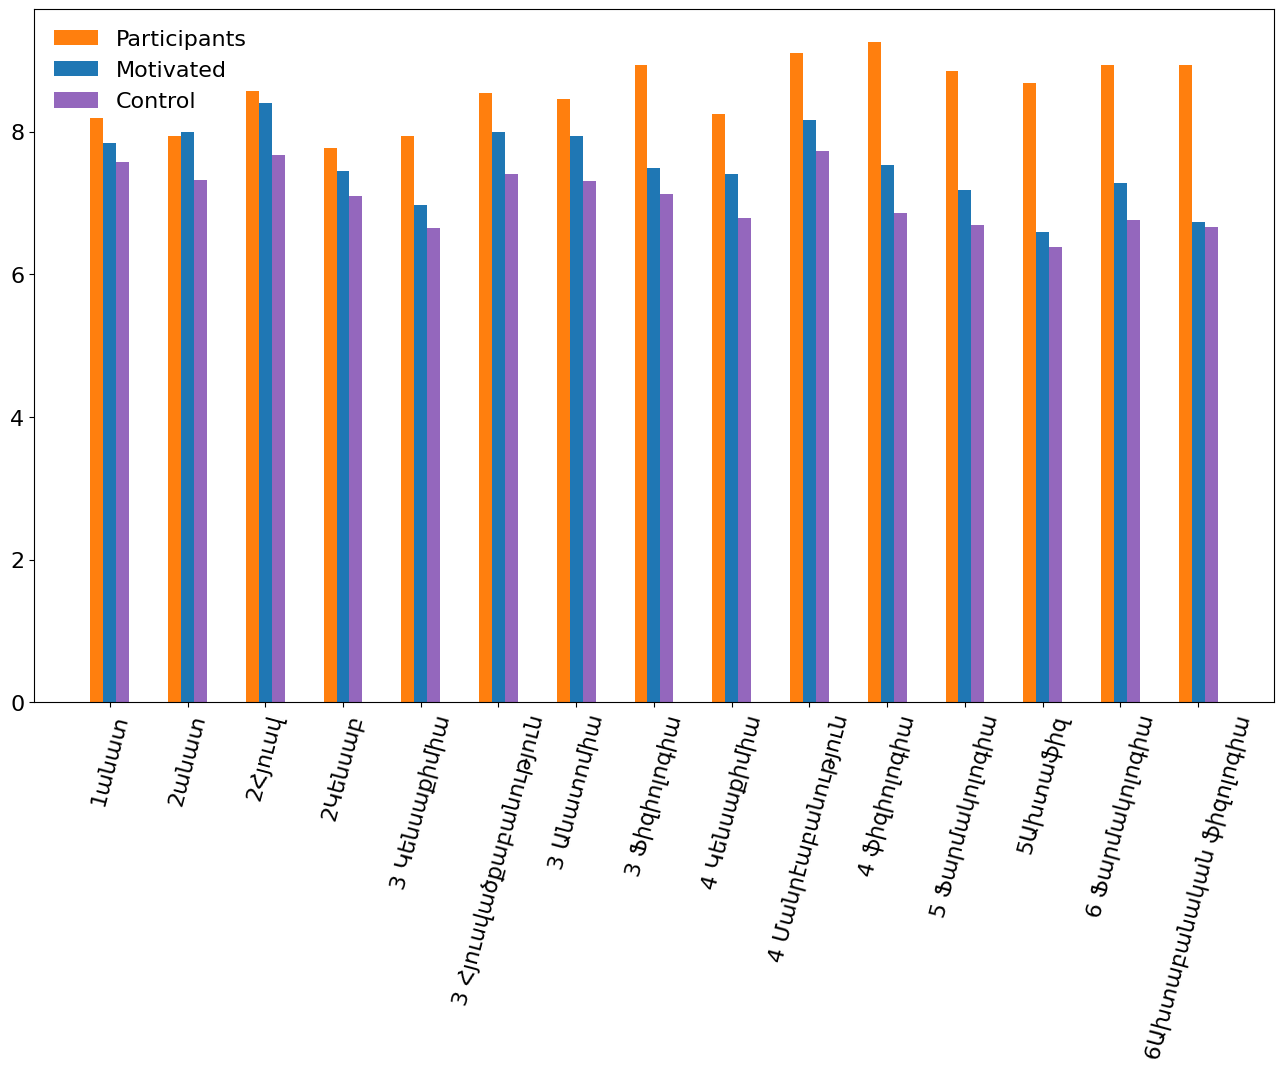

In [118]:
all_subjects = np.array(all_subjects)

motivated_subjects = motivated[all_subjects].mean(axis=0)
participants_subjects = participants[all_subjects].mean(axis=0)
control_subjects = control[all_subjects].mean(axis=0)

# plt.bar all the subjects and their mean next to each other
# 3 bars for each subject, one for each group
plt.figure(figsize=(16, 9))
plt.bar(np.arange(len(all_subjects)) * 3 - 0.5, participants_subjects, color=nice_colors[1], width=0.5)
plt.bar(np.arange(len(all_subjects)) * 3, motivated_subjects, color=nice_colors[0], width=0.5)
plt.bar(np.arange(len(all_subjects)) * 3 + 0.5, control_subjects, color=nice_colors[4], width=0.5)
# plt.legend(['Participants', 'Motivated', 'Control'], fontsize=16, loc=(0.195, 0.85))
# make the legend box transparent
plt.legend(['Participants', 'Motivated', 'Control'], fontsize=16, loc='upper left', framealpha=0)
plt.yticks(fontsize=16)
plt.xticks(np.arange(len(all_subjects)) * 3, all_subjects, rotation=75, fontsize=16)

In [31]:
semester_3 = ['Biochemistry_3', 'Histology_3', 'Human_anatomy_3']
semester_4 = ['Biochemistry_4', 'Microbiology_4']
semester_5 = ['pathological_anatomy_5', 'pharmacology_5', 'pathological_physiology_5']
semester_6 = ['pathological_anatomy_6', 'pharmacology_6', 'pathological_physiology_6']

sem = [[], [], [], semester_3, semester_4, semester_5, semester_6]

In [71]:
data

,Numbering,Study groups,StudentID,Group,1անատ,2անատ,2Հյուսվ,2Կենսաբ,Sum of 1 Year,3 Կենսաքիմիա,3 Հյուսվածքաբանություն,3 Անատոմիա,3 Ֆիզիոլոգիա,4 Կենսաքիմիա,4 Մանրէաբանություն,4 ֆիզիոլոգիա,Sum of 2 year,5 Մանրէաբանություն,5Ախտաբանական անատոմիա,5 Ֆարմակոլոգիա,5Ախտաֆիզ,5 Օպերատիվ վիրաբուժություն,5Ներքին հիվանդությունների պրոպեդևտիկա,5 Ընդհանուր վիրաբուժություն,6Ներքին հիվանդությունների պրոպեդևտիկա,6Ախտաբանական անատոմիա,6 Ֆարմակոլոգիա,6Ախտաբանական ֆիզոլոգիա,6 Ընդհանուր վիրաբուժություն,sum
0,1,Motivated,21892,203,9,9,10,10,38,8,10,9,10,9,10,9,65,6,8,8,7,7,9,10,10,7,8,8,10,98
1,2,Motivated,21894,203,10,10,9,6,35,8,10,10,10,8,8,10,64,6,8,8,7,8,9,8,10,6,8,7,10,95
2,3,Motivated,21889,203,8,8,8,9,33,6,9,8,7,8,8,8,54,5,7,6,7,6,9,8,9,7,7,7,8,86
3,4,Motivated,21897,203,7,8,8,9,32,7,9,9,8,6,6,7,52,7,6,7,6,5,8,8,8,6,6,7,7,81
4,5,Motivated,21929,205,10,9,9,7,35,8,10,10,10,10,10,10,68,9,9,10,8,8,10,10,10,9,10,9,10,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,288,Control,22326,235,7,7,7,8,29,5,8,6,6,5,7,5,42,5,5,8,5,7,6,6,8,6,8,7,8,79
412,289,Control,22356,235,6,7,7,7,27,6,5,5,5,5,6,5,37,5,5,6,6,5,6,7,6,7,6,5,8,72
413,290,Control,22347,235,5,9,5,6,25,5,5,5,6,6,5,6,38,6,6,5,5,6,7,7,8,6,5,6,6,73
414,291,Control,22349,235,7,7,5,7,26,6,5,5,6,6,5,5,38,5,5,5,5,5,5,6,6,5,5,6,6,64


In [33]:
def phys_weight(id, semester):
    if semester != 3 and semester != 4:
        raise Exception('should be 3 or 4')
    phys_name = f'Normal_physiology_{semester}'
    data_id = data[data['ID'] == id]
    return data_id[phys_name].iloc[0] / data_id[sem[semester] + [phys_name]].iloc[0].sum() * (1 + len(sem[semester]))

In [34]:
def gpa(id, semester):
    complete_set = [x for x in sem[semester]]
    if semester < 4:
        phys_name = f'Normal_physiology_{semester}'
        complete_set.append(phys_name)
    data_id = data[data['ID'] == id]
    return data_id[complete_set].iloc[0].sum() / len(complete_set)

In [35]:
def phys_weight_diff(id):
    return phys_weight(id, 4) - phys_weight(id, 3)

In [36]:
gpa_groups = {
    '5_7-': set(),
    '7_9-': set(),
    '9_10': set()
}

def get_gpa_group(id):
    if gpa(id, 3) < 7:
        return '5_7-'
    if gpa(id, 3) < 9:
        return '7_9-'
    return '9_10'

for id in data['ID']:
    gpa_groups[get_gpa_group(id)].add(id)

KeyError: 'ID'

In [247]:
[len(gpa_groups[g]) for g in gpa_groups]

[185, 196, 84]

In [248]:
group1 = data[data['Groups'] == 1]
group2 = data[data['Groups'] == 2]
group3 = data[data['Groups'] == 3]
group4 = data[data['Groups'] == 4]

In [37]:
def slices_of_group(group):
    slices = {}
    for g in gpa_groups:
        slices[g] = []
    for id in group['ID']:
        slices[get_gpa_group(id)].append(group[group['ID'] == id])
    for g in gpa_groups:
        slices[g] = pd.concat(slices[g])
    return slices


In [38]:
slices_of_g1 = slices_of_group(group1)
slices_of_g2 = slices_of_group(group2)
slices_of_g3 = slices_of_group(group3)
slices_of_g4 = slices_of_group(group4)

NameError: name 'group1' is not defined

In [39]:
def phys_weight_diff_avg(group):
    return sum([phys_weight_diff(id) for id in group['ID']]) / len(group)

In [40]:
def phys_weight_avg(group, semester):
    return sum([phys_weight(id, semester) for id in group['ID']]) / len(group)

In [41]:
def avg_gpa(group, semester):
    return sum([gpa(id, semester) for id in group['ID']]) / len(group)

In [274]:
def print_info(name, group):
    print(name)
    print(f'Number of students : {len(group)}')
    print(f'Average gpa sem 3  : {avg_gpa(group, 3):4.5f}')
    print(f'Average gpa sem 4  : {avg_gpa(group, 4):4.5f}')
    print(f'Average of weight of phys sem 3 : {phys_weight_avg(group, 3):4.5f}')
    print(f'Average of weight of phys sem 4 : {phys_weight_avg(group, 4):4.5f}')
    print(f'Average of diffs of weights     : {phys_weight_diff_avg(group):4.5f}')
    print()

for g in gpa_groups:
    print(g)
    print_info(f'Group 1', slices_of_g1[g])
    print_info(f'Group 2', slices_of_g2[g])
    print_info(f'Group 3', slices_of_g3[g])
    print_info(f'Group 4', slices_of_g4[g])
    print('-'*80)

5_7-
Group 1
Number of students : 8
Average gpa sem 3  : 6.18750
Average gpa sem 4  : 6.87500
Average of weight of phys sem 3 : 1.01224
Average of weight of phys sem 4 : 1.00133
Average of diffs of weights     : -0.01091

Group 2
Number of students : 74
Average gpa sem 3  : 6.05405
Average gpa sem 4  : 6.29054
Average of weight of phys sem 3 : 1.01255
Average of weight of phys sem 4 : 0.98566
Average of diffs of weights     : -0.02689

Group 3
Number of students : 17
Average gpa sem 3  : 6.04412
Average gpa sem 4  : 6.50000
Average of weight of phys sem 3 : 0.99421
Average of weight of phys sem 4 : 0.97977
Average of diffs of weights     : -0.01443

Group 4
Number of students : 86
Average gpa sem 3  : 6.00000
Average gpa sem 4  : 6.19767
Average of weight of phys sem 3 : 1.03754
Average of weight of phys sem 4 : 0.98743
Average of diffs of weights     : -0.05011

--------------------------------------------------------------------------------
7_9-
Group 1
Number of students : 28
Averag

In [263]:
slices_of_g1['7_9-']['Biochemistry_3'].mean()

np.float64(7.464285714285714)

In [264]:
slices_of_g1['7_9-']['Normal_physiology_3'].mean()

np.float64(8.428571428571429)

In [265]:
slices_of_g1['7_9-']['Histology_3'].mean()

np.float64(8.5)

In [268]:
slices_of_g1['7_9-']['Human_anatomy_3'].mean()

np.float64(8.25)

In [273]:
gr = slices_of_g1['7_9-']
weights = []
for id in gr['ID']:
    print(f'{id = :3}, {phys_weight(id, 3):1.3f}')
    weights.append(phys_weight(id, 3))

print(sum(weights) / len(weights))

id =   1, 0.966
id =   2, 1.143
id =   3, 0.933
id =  11, 1.029
id =  12, 1.059
id =  14, 1.029
id =  15, 1.059
id =  16, 0.970
id =  17, 1.000
id =  18, 0.848
id =  20, 1.029
id =  21, 0.970
id =  22, 1.032
id =  27, 1.161
id =  28, 1.000
id =  33, 0.941
id =  40, 1.143
id =  43, 1.125
id =  44, 1.029
id =  45, 1.029
id =  46, 0.933
id =  48, 1.029
id =  52, 1.000
id =  54, 1.067
id =  57, 1.091
id =  60, 1.143
id =  61, 1.143
id =  62, 1.000
1.0320666968880785


In [ ]:
3 * f / (a + b + c)